In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(r'data/'))


['sign_mnist_train', 'amer_sign2.png', 'sign_mnist_test', 'amer_sign3.png', 'sign_mnist_test.csv', 'my_model.h5', 'sign_mnist_train.csv', 'american_sign_language.PNG', 'datasets']


In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


2022-09-28 18:59:54.112934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 18:59:55.688903: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/riyaz/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-28 18:59:55.688932: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-28 18:59:58.817046: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerro

In [3]:
cd data/

/home/riyaz/Desktop/Hand_Recognition/data


In [3]:
train = pd.read_csv('sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test = pd.read_csv('sign_mnist_test.csv')
print(test.shape)
test.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
Y_train = train['label']
X_train = train.drop(labels = ['label'], axis  = 1)

In [6]:
y_test = test['label']
x_test = test.drop(labels = ['label'], axis  = 1)

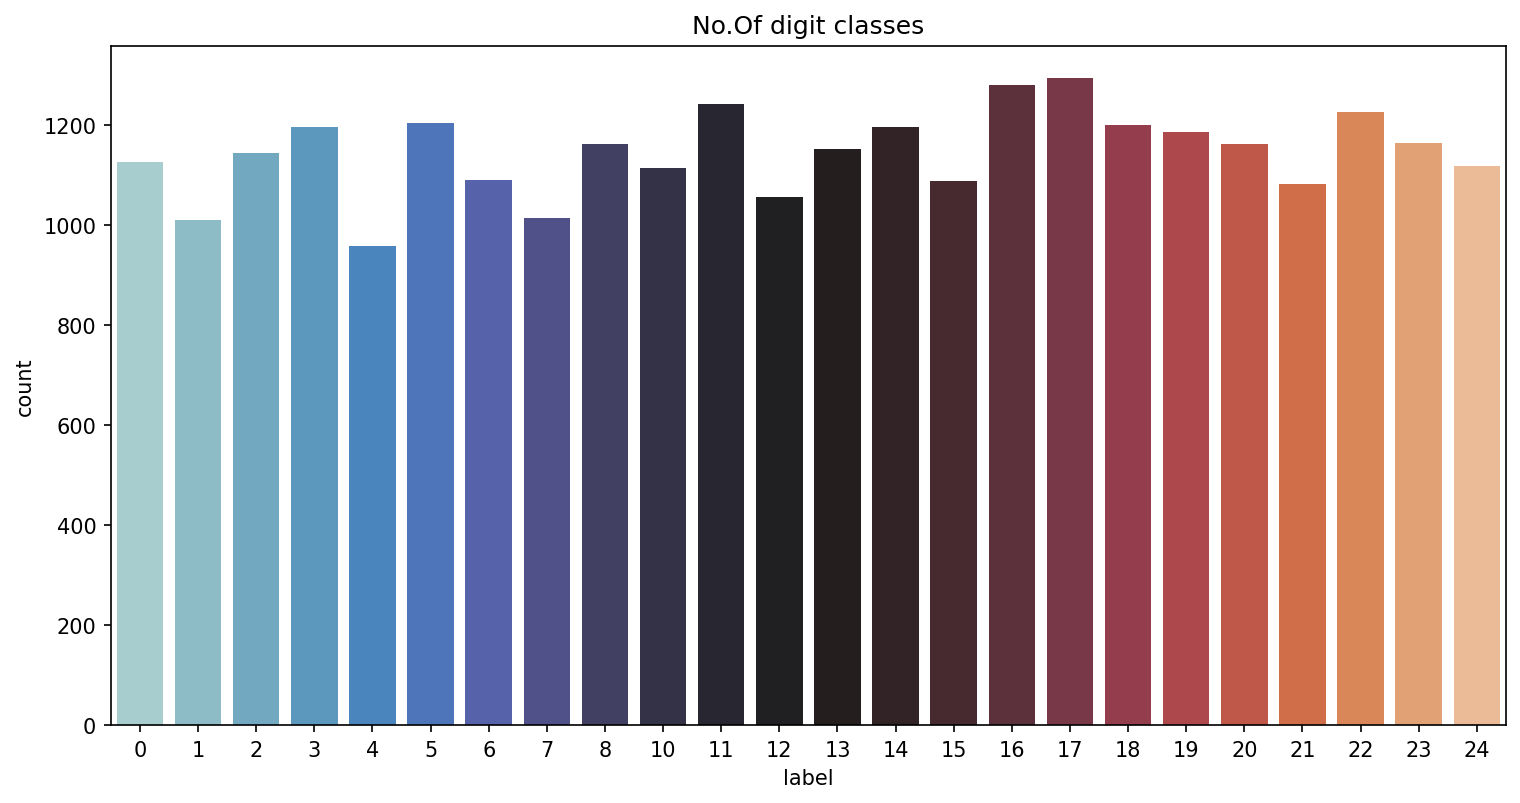

In [7]:
plt.figure(figsize = (12,6), dpi = 150)
g = sns.countplot(Y_train, palette = 'icefire')
plt.title('No.Of digit classes')
plt.show()

In [8]:
Y_train.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [9]:
type(X_train.iloc[0])

pandas.core.series.Series

(784,)


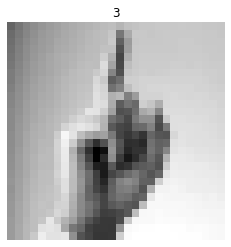

(28, 28)


In [10]:
img = X_train.iloc[0].to_numpy()
print(img.shape)
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[0,0])
plt.axis('OFF')
plt.show()
print(img.shape)

In [11]:
pwd

'/home/riyaz/Desktop/Hand_Recognition/data'

In [12]:
df = pd.read_csv('sign_mnist_train.csv')

In [13]:
df = df.set_index(df['label'])

In [14]:
df = df.drop(labels = ['label'], axis  = 1)

In [15]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
3,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
6,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
2,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
13,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


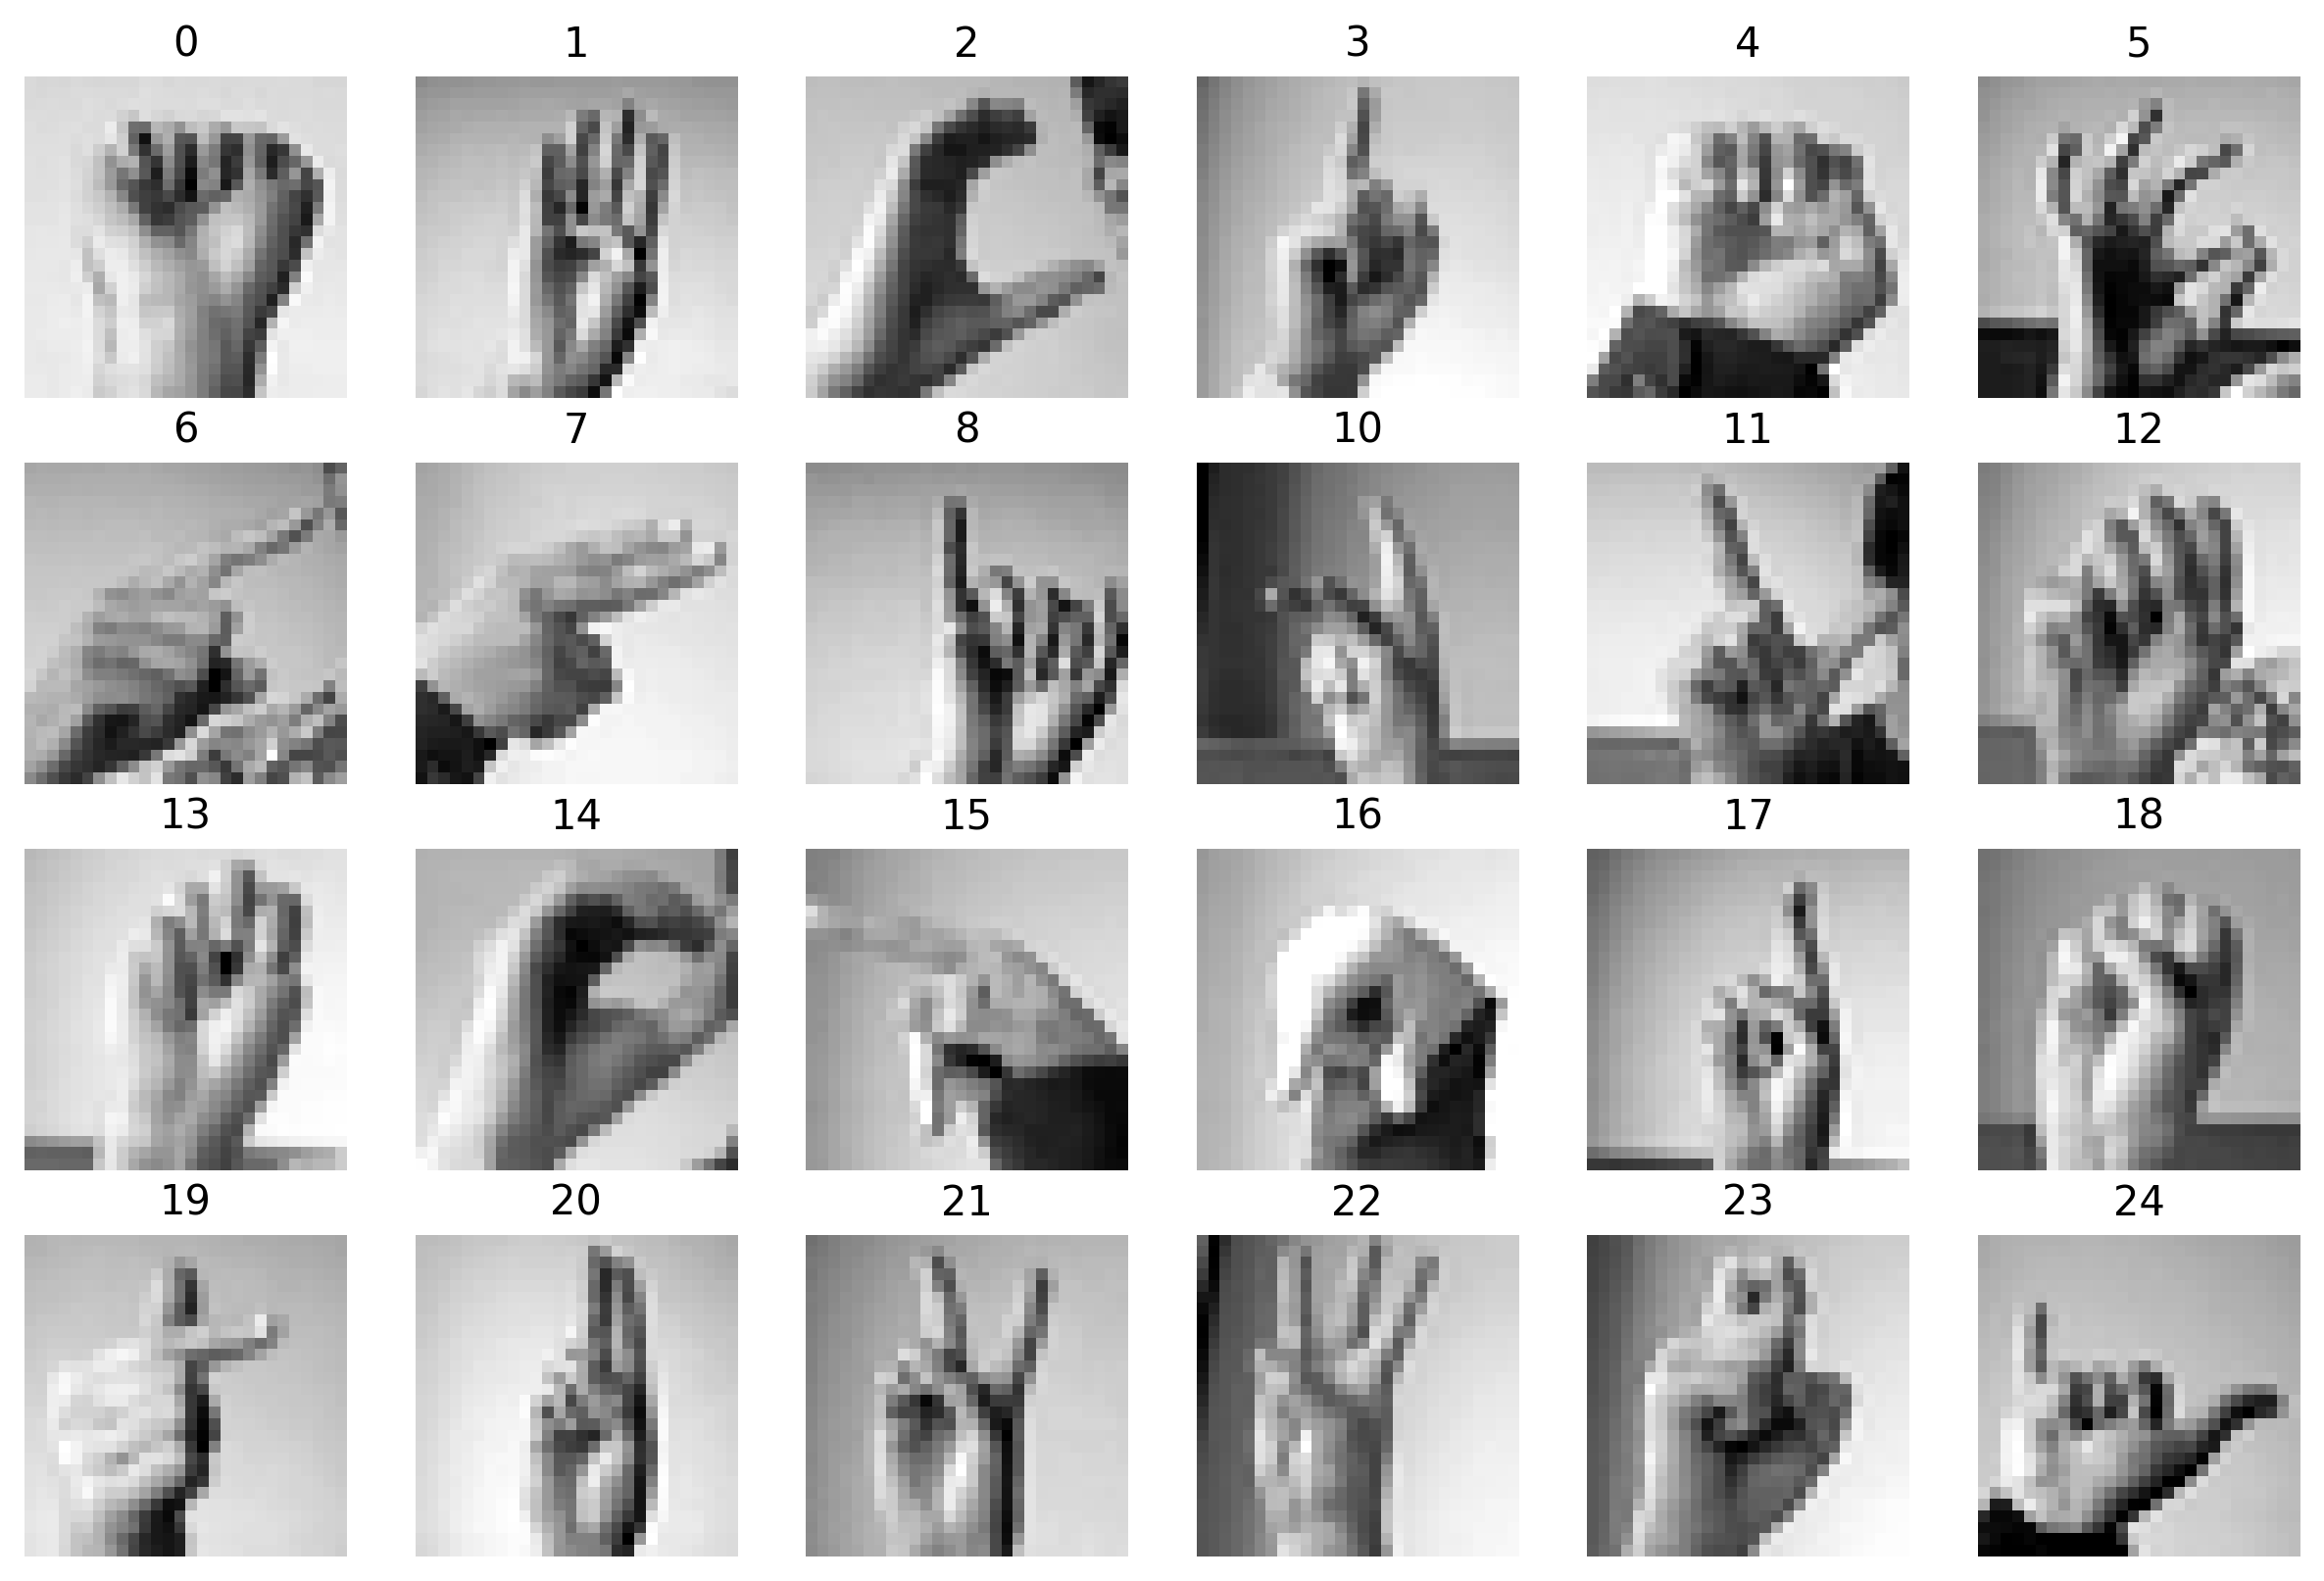

In [16]:
plt.figure(figsize=(12,8), dpi=250)
num = 1
for i in range(25):
    if i == 9:
        pass
    else:
        plt.subplot(4, 6, num)
        im = df.loc[i].iloc[0].to_numpy()
        im = im.reshape(28,28)
        plt.imshow(im, cmap = 'gray')
        plt.title(i)
        plt.axis('OFF')
        num += 1

In [17]:
# Normalization
X_train = X_train/ 255.0
x_test = x_test/ 255.0

print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (27455, 784)
test shape:  (7172, 785)


In [18]:
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [19]:
X_train.shape

(27455, 28, 28, 1)

In [20]:
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [21]:
x_test.shape

(7172, 28, 28, 1)

In [22]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

2022-09-27 14:05:53.704426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 14:05:57.460253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-27 14:05:57.460327: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-27 14:06:03.594505: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [31]:
# Y_train = to_categorical(Y_train, num_classes = 24)

In [28]:
Y_train.value_counts().count()

24

In [29]:
Y_train = pd.get_dummies(Y_train)

In [30]:
Y_train

,0,1,2,3,4,5,6,7,8,10,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27453,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val =  train_test_split(X_train, Y_train, test_size = 0.2, random_state = 11)

In [33]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [53]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation = 'softmax'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)         

In [55]:
optimizer = Adam(learning_rate = 0.0001) # learning rate and exponential decay rate, (, beta_1 = 0.9, beta_2 = 0.99)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) # rho is the "Gradient moving average [also exponentially weighted average] decay factor" and decay is the "Learning rate decay over each update".

In [56]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
epochs = 100
batch_size = 75

In [58]:
datagen = ImageDataGenerator(
                            featurewise_center = False, # set input mean to 0 over the dataset
                            samplewise_center = False, # set each sample mean to 0
                            featurewise_std_normalization = False, # divide inputs by std of the dataset
                            samplewise_std_normalization = False, # divide each input by its std
                            zca_whitening = False, # dimesion reduction
                            rotation_range = 10, # randomly rotate images in the range 5 degrees
                            zoom_range = 0.2, # Randomly zoom image 10%
                            width_shift_range = 0.2, # randomly shift images horizontally 10%
                            height_shift_range = 0.2, # randomly shift images vertically 10%
                            horizontal_flip = False, # randomly flip images
                            vertical_flip = False) # randomly flip images

datagen.fit(X_train)

In [59]:
classifier = model.fit(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, 
                      validation_data = (X_val, Y_val), steps_per_epoch = 250) # callbacks=[learning_rate_reduction]

Epoch 1/100
250/250 [==============================] - 13s 51ms/step - loss: 3.1780 - accuracy: 0.0487 - val_loss: 3.1742 - val_accuracy: 0.0543
Epoch 2/100
250/250 [==============================] - 12s 48ms/step - loss: 3.1678 - accuracy: 0.0549 - val_loss: 3.1608 - val_accuracy: 0.1060
Epoch 3/100
250/250 [==============================] - 12s 48ms/step - loss: 3.1243 - accuracy: 0.0813 - val_loss: 3.0056 - val_accuracy: 0.1874
Epoch 4/100
250/250 [==============================] - 13s 53ms/step - loss: 2.9688 - accuracy: 0.1228 - val_loss: 2.7385 - val_accuracy: 0.2528
Epoch 5/100
250/250 [==============================] - 13s 52ms/step - loss: 2.8176 - accuracy: 0.1600 - val_loss: 2.5075 - val_accuracy: 0.3227
Epoch 6/100
250/250 [==============================] - 13s 52ms/step - loss: 2.6867 - accuracy: 0.1956 - val_loss: 2.2984 - val_accuracy: 0.3717
Epoch 7/100
250/250 [==============================] - 14s 54ms/step - loss: 2.5659 - accuracy: 0.2229 - val_loss: 2.1154 - val_ac

250/250 [==============================] - 16s 65ms/step - loss: 0.5857 - accuracy: 0.8009 - val_loss: 0.1327 - val_accuracy: 0.9645
Epoch 58/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5582 - accuracy: 0.8107 - val_loss: 0.1200 - val_accuracy: 0.9678
Epoch 59/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5562 - accuracy: 0.8066 - val_loss: 0.1215 - val_accuracy: 0.9718
Epoch 60/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5514 - accuracy: 0.8129 - val_loss: 0.1114 - val_accuracy: 0.9747
Epoch 61/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5414 - accuracy: 0.8129 - val_loss: 0.1089 - val_accuracy: 0.9747
Epoch 62/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5362 - accuracy: 0.8196 - val_loss: 0.1054 - val_accuracy: 0.9734
Epoch 63/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5241 - accuracy: 0.8182 - val_loss: 0.1030 - val_accuracy

In [60]:
model.save('my_model.h5')

In [61]:
classifier.history

{'loss': [3.1780476570129395,
  3.1678199768066406,
  3.124288320541382,
  2.9688186645507812,
  2.8175809383392334,
  2.6867096424102783,
  2.5658631324768066,
  2.4564192295074463,
  2.3180906772613525,
  2.2087440490722656,
  2.109734296798706,
  2.015054941177368,
  1.9178653955459595,
  1.8334646224975586,
  1.7461588382720947,
  1.6670057773590088,
  1.6033260822296143,
  1.530632495880127,
  1.4721484184265137,
  1.420749545097351,
  1.3629783391952515,
  1.3287534713745117,
  1.2797574996948242,
  1.2275828123092651,
  1.1997359991073608,
  1.1616262197494507,
  1.1350587606430054,
  1.0911723375320435,
  1.066503643989563,
  1.0283406972885132,
  0.9972571134567261,
  0.9821687340736389,
  0.9533188343048096,
  0.9318376183509827,
  0.9159884452819824,
  0.8974586129188538,
  0.8778761625289917,
  0.8456882238388062,
  0.8247570991516113,
  0.8149827718734741,
  0.7954651117324829,
  0.7772839069366455,
  0.7572819590568542,
  0.7405696511268616,
  0.731859564781189,
  0.72205

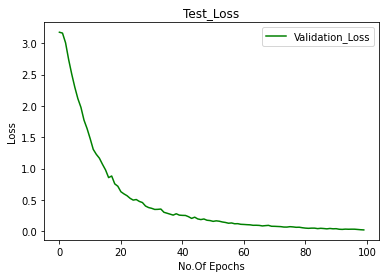

In [62]:
plt.plot(classifier.history['val_loss'], color = 'g', label = 'Validation_Loss')
plt.title('Test_Loss')
plt.xlabel('No.Of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
import seaborn as sns

Y_pred = model.predict(X_val)
pred_class = np.argmax(Y_pred, axis = 1)
# actual_class = np.argmax(Y_val, axis = 1)

actual_class = []
for i in range(5491):
    
    actual_class.append(Y_val.iloc[i].argmax())
    
# actual_class = np.array(actual_class)
pred_class = list(pred_class)

confusion_mtrx = confusion_matrix(actual_class, pred_class)
confusion_mtrx

172/172 [==============================] - 1s 5ms/step


array([[234,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 205,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 242,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 190,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 213,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 215,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

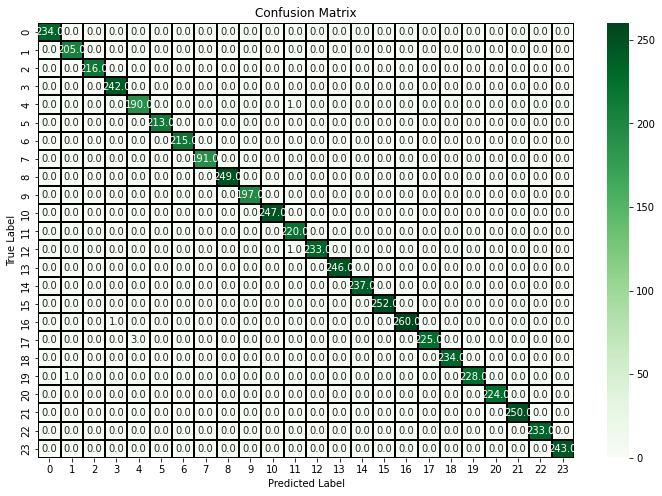

In [91]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_mtrx, annot=True, cmap = 'Greens', linewidths = 0.01, linecolor = 'black', fmt = '.1f')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [107]:
import numpy as np
import cv2 as cv
from PIL import Image
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model
import tensorflow as tf


classifier = tf.keras.models.load_model('my_model.h5')

cap = cv.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
cap.set(10,150)


while True: 
    
    _, frame = cap.read()
    crop_img = frame[100:380, 100:380]
    
    im_c = cv.cvtColor(crop_img, cv.COLOR_BGR2GRAY)
    im2 = cv.resize(im_c, (28, 28))
    im = im2.reshape(28, 28, -1)
    im = im.reshape(1, 28, 28, 1)
#     im = cv.bitwise_not(im)
    cv.imshow("image", im.reshape(28, 28))
#     plt.imshow(im.reshape(28, 28))
    result = classifier.predict(im)
    a = np.argmax(result) 


    cv.rectangle(frame,(100,100),(380, 380),(0,255,0),2)
    cv.putText(frame,'Predicted Digit : ' + str(a),
                    (50,50),cv.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
    cv.imshow("Original Image",frame)

    #cv.imshow('O/P', frame)
    
    key = cv.waitKey(1)
    if key == 27:
        break

cap.release()        
cv.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


In [4]:
train = pd.read_csv('sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test = pd.read_csv('sign_mnist_test.csv')
print(test.shape)
test.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
Y_train = train['label']
X_train = train.drop(labels = ['label'], axis  = 1)

In [7]:
y_test = test['label']
x_test = test.drop(labels = ['label'], axis  = 1)

In [17]:
os.chdir(r'../datasets/')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
#     os.mkdir('valid')
    os.mkdir('valid')
    
    for i in range(0,25):
        if i == 9:
            pass
        else: 
    #         shutil.move(f'{i}', 'train')
            os.mkdir(f'train/{i}')
    #         os.mkdir(f'valid/{i}')
            os.mkdir(f'valid/{i}')

In [18]:
import shutil
import cv2 as cv
for j in range(len(Y_train)):

    img = X_train.iloc[j].to_numpy()
    img = img.reshape(28,28)
    cv.imwrite(f'{str(j)}{str(Y_train[j])}.jpg', img)
    shutil.move(f'{str(j)}{str(Y_train[j])}.jpg', f'train/{Y_train[j]}')

In [19]:
os.mkdir('pred')    
for k in range(len(x_test)):
    img = x_test.iloc[k].to_numpy()
    img = img.reshape(28,28)
    cv.imwrite(f'{str(k)}{str(3*len(x_test) - k)}.jpg', img)
    shutil.move(f'{str(k)}{str(3*len(x_test) - k)}.jpg', f'pred')

# os.chdir('./.')

In [20]:
import random
for i in range(0,25):
    if i == 9:
        pass
    else: 
        valid_samples = random.sample(os.listdir(f'train/{i}'), 300)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

In [22]:
os.mkdir('test') 
for i in range(0,25):
        if i == 9:
            pass
        else: 
            os.mkdir(f'test/{i}')


In [23]:
for i in range(0,25):
    if i == 9:
        pass
    else:
        test_samples = random.sample(os.listdir(f'train/{i}'), 100)
        for j in test_samples:
            shutil.move(f'train/{i}/{j}', f'test/{i}')

In [24]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [27]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=train_path, target_size=(28,28), batch_size=24)

Found 17855 images belonging to 24 classes.


In [28]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 2400 images belonging to 24 classes.


In [29]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=valid_path, target_size=(224,224), batch_size=10)

Found 7200 images belonging to 24 classes.


In [30]:
mobile = tf.keras.applications.mobilenet.MobileNet()

2022-09-28 19:00:41.312291: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/riyaz/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-28 19:00:41.312348: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-28 19:00:41.312372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (riyaz-Latitude-7400): /proc/driver/nvidia/version does not exist
2022-09-28 19:00:41.312697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropria

17225924/17225924 [==============================] - 1s 0us/step


In [31]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [32]:
x = mobile.layers[-5].output
y = tf.reshape(x, shape=(-1, 1024))
output = Dense(units=24, activation='softmax')(y)

In [33]:
model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [34]:
len(model.layers)

89

In [35]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [38]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
744/744 - 141s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 141s/epoch - 190ms/step
Epoch 2/10
744/744 - 142s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 142s/epoch - 190ms/step
Epoch 3/10
744/744 - 139s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 139s/epoch - 187ms/step
Epoch 4/10
744/744 - 171s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 171s/epoch - 229ms/step
Epoch 5/10
744/744 - 162s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 162s/epoch - 218ms/step
Epoch 6/10
744/744 - 139s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 139s/epoch - 186ms/step
Epoch 7/10
744/744 - 141s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 141s/epoch - 190ms/step
Epoch 8/10
744/744 - 142s - loss: nan - accuracy: 0.0407 - val_loss: nan - val_accuracy: 0.0417 - 142s/epoch - 191ms/step
Epoch 9/10
744/744 - 150

In [ ]:
test_labels = test_batches.classes

In [ ]:
test_labels

In [ ]:
pred = model.predict(x=test_batches, verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred = pred.argmax(axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'])

In [ ]:
%matplotlib inline

disp.plot()

# disp.plot(cmap = plt.cm.Blues)

In [ ]:
model.save('hand_write_digit.h5')

In [ ]:
# from PIL import Image
# im = Image.open('5.jpg')

im_c = cv.imread('images_5.jpg')
im = cv.cvtColor(im_c, cv.COLOR_BGR2RGB)

re_size=cv.resize(im,(224,224))
norm=re_size/255.0
reshap=np.reshape(norm,(1,224,224,3))
reshap = np.vstack([reshap])


pred = model.predict(reshap)
# np.argmax(pred)
np.argmax(pred,axis=1)[0]

In [ ]:
reshap.shape

plt.imshow(reshap.reshape(224,224,3))

In [ ]:
import numpy as np
import cv2 as cv
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model


classifier = tf.keras.models.load_model('hand_write_digit.h5')

cap = cv.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
cap.set(10,150)


while True: 
    
    _, frame = cap.read()
    
    crop_img = frame[10:234, 100:334]
    
    img_c = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB) # importent
        
    re_sized=cv.resize(img_c,(224,224))
    normalized=re_sized/255.0
    reshaped=np.reshape(normalized,(1,224,224,3))
    reshaped = np.vstack([reshaped])
    
    pred = model.predict(reshaped)
    a = np.argmax(pred,axis=1)[0]

    cv.rectangle(frame,(10,100),(234, 334),(0,255,0),2)
    cv.putText(frame,'Predicted Gesture : ' + str(a),
                    (50,50),cv.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
    cv.imshow("Original Image",frame)

    #cv.imshow('O/P', frame)
    
    key = cv.waitKey(1)
    if key == 27:
        break

cap.release()        
cv.destroyAllWindows()